# House prices 5: Dimentionality reduction and feature engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
sns.set()

In [10]:
train = pd.read_csv("train3.csv")
test = pd.read_csv("test3.csv")
dataframes = [train, test]
all_data = pd.concat(dataframes)
numerical = all_data.select_dtypes(include=np.number)
categorical = all_data.select_dtypes(exclude=np.number)

In [11]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,2,2006,0,2,140000
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,12,2008,0,0,250000


In [12]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,4,80.0,11622,0,0,0,0,0,...,120,0,0,0,0,0,6,2010,0,0
1,1462,20,0,81.0,14267,0,0,1,0,0,...,0,0,0,0,1,12500,6,2010,0,0
2,1463,60,0,74.0,13830,0,0,1,0,0,...,0,0,0,0,0,0,3,2010,0,0
3,1464,60,0,78.0,9978,0,0,1,0,0,...,0,0,0,0,0,0,6,2010,0,0
4,1465,120,0,43.0,5005,0,0,1,1,0,...,144,0,0,0,0,0,1,2010,0,0


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
pca = PCA(random_state=0)

In [15]:
#Explore the influence of each variable in the model
target = train["SalePrice"]
train = train.drop("SalePrice", axis=1)
scaled_train  = scaler.fit_transform(train)
scaled_test = scaler.transform(test)
pca_0 = pca.fit_transform(scaled_train)
variance = pca.explained_variance_ratio_ * 100
cumsum = np.cumsum(variance)

In [16]:
print("Variance matrix: ", variance)
print("Python type: ", type(variance), "\n")
print("Cumulative sum: ", cumsum, "\n")
print("Weight of first 1 components = ", cumsum[0])
print("Weight of first 2 components = ", cumsum[1])
print("Weight of first 3 components = ", cumsum[2])
print("Weight of first 5 components = ", cumsum[4])
print("Weight of first 10 components = ", cumsum[9])
print("Weight of first 20 components = ", cumsum[19])
print("Weight of first 30 components = ", cumsum[29])
print("Weight of first 50 components = ", cumsum[49])

Variance matrix:  [1.27798212e+01 5.28225764e+00 5.07082479e+00 3.32328406e+00
 3.26950196e+00 2.64061003e+00 2.40357812e+00 2.18761488e+00
 2.17757973e+00 2.06875433e+00 1.96759855e+00 1.89290224e+00
 1.82587663e+00 1.79242719e+00 1.73620990e+00 1.62899533e+00
 1.55156752e+00 1.52538033e+00 1.48030067e+00 1.45279267e+00
 1.43328406e+00 1.37278589e+00 1.35169641e+00 1.33311837e+00
 1.28789422e+00 1.26441781e+00 1.23737277e+00 1.21207788e+00
 1.17729038e+00 1.16662484e+00 1.11227157e+00 1.08997202e+00
 1.08531727e+00 1.03851475e+00 1.02983235e+00 1.00276768e+00
 9.93692735e-01 9.68009114e-01 9.28250364e-01 9.24941696e-01
 9.07850417e-01 8.66248646e-01 8.55030284e-01 8.29292962e-01
 8.00627909e-01 7.79537478e-01 7.57317398e-01 7.39772608e-01
 7.21329864e-01 6.84740834e-01 6.74344130e-01 6.71184684e-01
 6.24894992e-01 6.08865770e-01 5.98768881e-01 5.83833284e-01
 5.44390423e-01 5.23523643e-01 5.05811568e-01 4.81805561e-01
 4.68146091e-01 4.51729276e-01 4.34166990e-01 4.01328105e-01
 3.823

Text(0, 0.5, 'Explained variance')

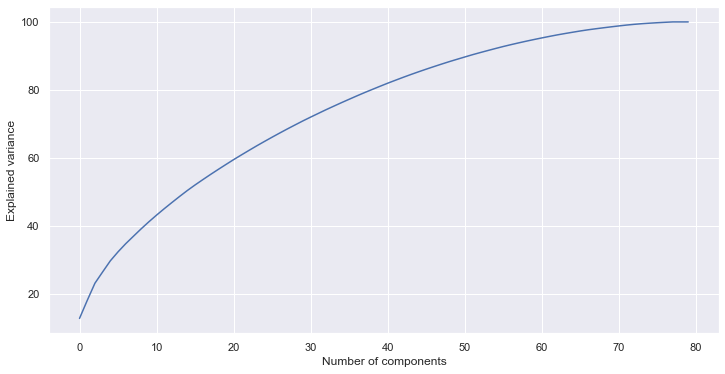

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(cumsum)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")

Text(0, 0.5, '2nd principal component')

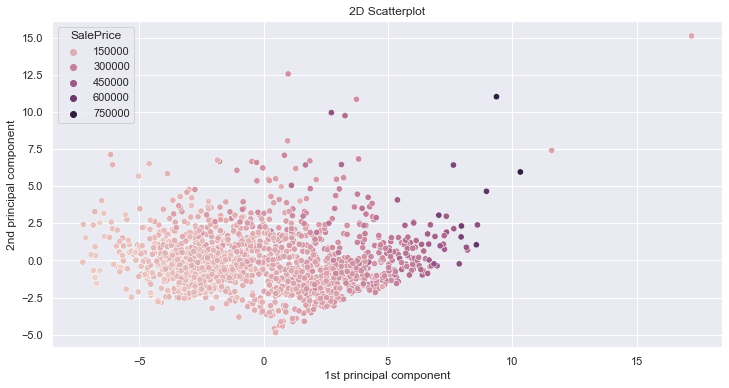

In [18]:
pca_2 = PCA(random_state = 0, n_components = 2).fit_transform(scaled_train)
plt.figure(figsize=(12, 6))
sns.scatterplot(x = pca_2[:, 0], y = pca_2[:, 1], s=40, hue=target)
plt.title("2D Scatterplot")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")

In [8]:
from mpl_toolkits import mplot3d

In [9]:
def scatter3D(s = 40):
    pca_3 = PCA(random_state = 0, n_components = 3).fit_transform(scaled_train)
    plt.figure(figsize=(12, 10))
    plt.title("3D Scatterplot")
    ax = plt.axes(projection="3d")
    ax.scatter3D(pca_3[:, 0], pca_3[:, 1], pca_3[:, 2], c=target, s=s, alpha=0.8)
    ax.set_xlabel("1st component")
    ax.set_ylabel("2nd component")
    ax.set_zlabel("3rd component")

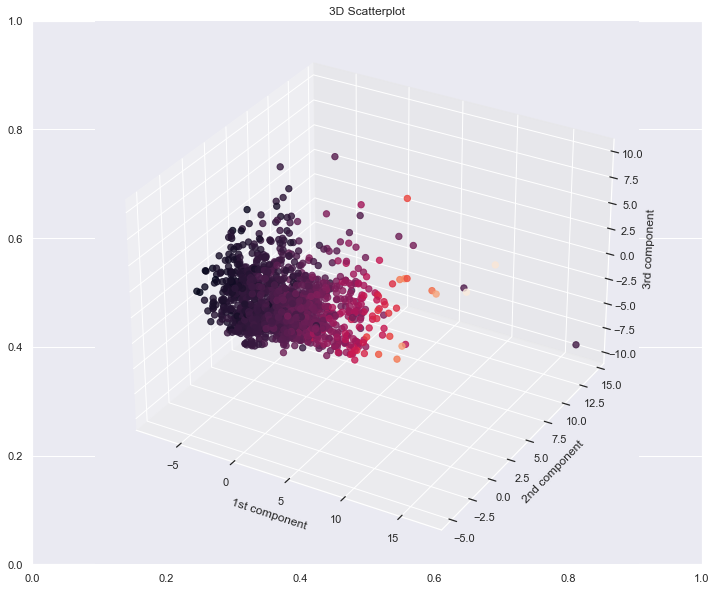

In [10]:
scatter3D(40)

Text(0, 0.5, '2nd principal component')

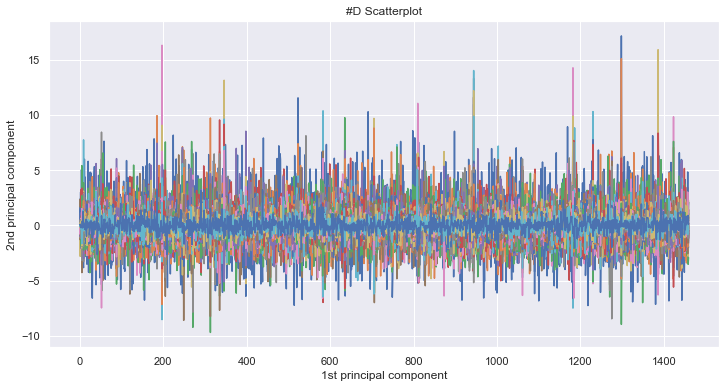

In [22]:
pca_80 = PCA(random_state = 0, n_components = 0.95)
pca_train = pca_80.fit_transform(scaled_train)
pca_test = pca_80.transform(scaled_test)
plt.figure(figsize=(12, 6))
plt.plot(pca_train)
plt.title("#D Scatterplot")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")

In [25]:
def pcaDataframe(array):
    columnNames = []
    for i in range(array.shape[1]):
        name = "PC"+str(i+1)
        columnNames.append(name)
    dataframe = pd.DataFrame(array, columns = columnNames)
    return dataframe

In [27]:
train_frame = pcaDataframe(pca_train)
test_frame = pcaDataframe(pca_test)

In [28]:
train_frame.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61
0,2.370383,-1.654415,1.237482,0.465807,-1.288778,0.332945,0.158756,-0.392675,-0.167770,0.629710,...,-0.313298,-0.409873,0.164893,0.136675,-0.370757,0.353982,-0.060225,-0.182365,-0.074395,0.080388
1,0.403006,-0.011228,-2.131879,0.098877,-1.176910,-0.958587,0.025116,-0.833906,0.035710,0.317933,...,0.017182,-0.388035,-0.228935,-1.011765,-0.885000,-0.807852,0.512914,0.242279,0.027259,0.111263
2,3.026980,-1.124901,0.452832,0.703419,-1.093745,-0.681499,0.291153,-0.499580,-0.166441,0.447393,...,-0.436871,-0.742501,0.408639,1.138141,-0.376311,0.256989,0.068064,-0.090233,-0.089224,-0.193154
3,-1.665610,1.886013,0.514048,-0.086987,0.262994,-0.074696,0.327520,-0.456146,-0.635724,-1.128103,...,0.447412,-1.876784,0.668025,0.694693,0.864526,0.644506,-1.183386,0.394510,-0.343915,-0.175020
4,5.056114,0.828548,1.006008,0.473406,-1.645287,-0.856669,-0.462503,-0.639873,-0.315414,0.569539,...,-0.033677,-0.541919,-0.010037,-0.259642,-0.030509,0.029960,0.353644,0.437413,-0.179243,-0.090525


In [29]:
test_frame.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61
0,-3.029287,-1.786183,-1.303886,-0.117850,-0.480211,0.336551,0.591596,1.714932,-0.134491,0.419934,...,2.194182,2.070098,-1.393803,1.307400,0.911125,0.291270,-1.302284,0.341618,-0.045136,-0.190291
1,-1.283854,1.917355,-1.933148,-0.669762,-1.919973,3.055027,4.094751,1.523224,11.034314,6.951093,...,0.197063,3.781462,-2.784335,-4.590493,2.296355,5.574457,-2.042708,1.312449,0.814387,0.273640
2,1.211471,-1.034017,0.397415,0.358997,-2.057677,-0.677728,-0.275836,-1.118168,0.739293,-0.395808,...,-0.189852,0.180461,-0.516813,0.617579,0.417389,-0.067333,0.097578,0.154363,0.706630,0.080298
3,2.022042,-1.141350,0.749786,-0.062532,-2.009390,-0.770013,-0.228585,-0.647578,0.435737,-0.063967,...,0.982753,-1.061650,-0.349436,-0.038362,0.338214,-0.045007,0.009752,0.763524,0.757433,-0.291520
4,1.219069,-2.119636,0.375200,1.080414,1.234008,-0.165198,0.336410,0.418939,0.473819,-1.141520,...,-0.244098,0.059862,0.848116,-0.585456,1.006896,0.284787,-0.456465,-0.308148,0.279233,0.079070


In [31]:
train_frame["target"] = target
train_frame.to_csv("pca_train.csv", index=False)
test_frame.to_csv("pca_test.csv", index = False)